In [114]:
using SymPy, Latexify
using Optim
using RemoteREPL
@async serve_repl()
varis = @vars Q T_1 T_2
@vars c_p
m = Q/c_p/(T_2-T_1)
diffs = diff.(m,varis)
strs = latexify.(diffs, env=:eq)

(L"\begin{equation}
\frac{1}{c_{p} \cdot \left(  - T_{1} + T_{2} \right)}
\end{equation}
", L"\begin{equation}
\frac{Q}{c_{p} \cdot \left(  - T_{1} + T_{2} \right)^{2}}
\end{equation}
", L"\begin{equation}
\frac{ - Q}{c_{p} \cdot \left(  - T_{1} + T_{2} \right)^{2}}
\end{equation}
")

In [115]:
strs[1]

L"\begin{equation}
\frac{1}{c_{p} \cdot \left(  - T_{1} + T_{2} \right)}
\end{equation}
"

In [116]:
strs[2]

L"\begin{equation}
\frac{Q}{c_{p} \cdot \left(  - T_{1} + T_{2} \right)^{2}}
\end{equation}
"

In [117]:
strs[3]

L"\begin{equation}
\frac{ - Q}{c_{p} \cdot \left(  - T_{1} + T_{2} \right)^{2}}
\end{equation}
"

In [118]:
w = Sym[string("w_",i) for i in varis]
w_m = √sum(diffs .^2 .* w .^2)
latexify(w_m^2/m^2 |> simplify,env=:eq)

L"\begin{equation}
\frac{w_{T\_1}^{2}}{\left( T_{1} - T_{2} \right)^{2}} + \frac{w_{T\_2}^{2}}{\left( T_{1} - T_{2} \right)^{2}} + \frac{w_{Q}^{2}}{Q^{2}}
\end{equation}
"

In [119]:
# convdict = Dict(
#     T_1=>0+5463/20, 
#     T_2=>100+5463/20, 
#     Q=>5000, 
#     w_T_1=> 2+5463/20, 
#     w_T_2=> 2+5463/20,
#     w_Q=> 3,
#     c_p => 4200,
# )
# UMF = sqrt.([i(convdict) for i in ((w_m^2/m^2 |> simplify).coeff.(w.^2) .* varis.^2)])

In [120]:
# (w_m^2/m^2)(convdict)

In [121]:
# varis = @vars P x ε b h E
# E = 6P*x/ε/b/h^2
# diffs = diff.(E,varis)
# w = Sym[string("w_",i) for i in varis]
# @vars w_rand
# w_m = √(sum(diffs .^2 .* w .^2))
# (relE = w_m^2/E^2 |> simplify )|> x->latexify(x,env=:eq)

In [122]:
# @vars w_i
# (relE((w ./ varis .=> w_i)...) +w_i^2 ~ 0.05^2) |> solve

In [123]:
# p = Sym["p_$i" for i in 1:5]
# @vars x
# # weird = p[1]*x*exp(p[2]*x*cos(p[3]*x))*cos(p[4]*x) + p[5]
# latexify(:([
#         x * exp(p[2] * x * cos(p[3] * x)) * cos(p[4] * x),
#         p[1] * (x^2) * exp(p[2] * x * cos(p[3] * x)) * cos(p[4] * x) * cos(p[3] * x),
#         -p[1] * p[2] * (x^3) * exp(p[2] * x * cos(p[3] * x)) * sin(p[3] * x) * cos(p[4] * x),
#         -p[1] * (x^2) * exp(p[2] * x * cos(p[3] * x)) * sin(p[4] * x),
#         1
#     ]), env=:eq)

\begin{equation}
\left[
\begin{array}{cc}
x e^{p_2 x \cos\left( p_3 x \right)} \cos\left( p_4 x \right) & 2 \left( p_5 + p_1 x e^{p_2 x \cos\left( p_3 x \right)} \cos\left( p_4 x \right) \right) x e^{p_2 x \cos\left( p_3 x \right)} \cos\left( p_4 x \right) \\
x^{2} p_1 e^{p_2 x \cos\left( p_3 x \right)} \cos\left( p_4 x \right) \cos\left( p_3 x \right) & 2 x^{2} p_1 \left( p_5 + p_1 x e^{p_2 x \cos\left( p_3 x \right)} \cos\left( p_4 x \right) \right) e^{p_2 x \cos\left( p_3 x \right)} \cos\left( p_4 x \right) \cos\left( p_3 x \right) \\
 - x^{3} p_1 p_2 e^{p_2 x \cos\left( p_3 x \right)} \sin\left( p_3 x \right) \cos\left( p_4 x \right) &  - 2 x^{3} p_1 \left( p_5 + p_1 x e^{p_2 x \cos\left( p_3 x \right)} \cos\left( p_4 x \right) \right) p_2 e^{p_2 x \cos\left( p_3 x \right)} \sin\left( p_3 x \right) \cos\left( p_4 x \right) \\
 - x^{2} p_1 e^{p_2 x \cos\left( p_3 x \right)} \sin\left( p_4 x \right) &  - 2 x^{2} p_1 \left( p_5 + p_1 x e^{p_2 x \cos\left( p_3 x \right)} \cos\left( p_4 x \right) \right) e^{p_2 x \cos\left( p_3 x \right)} \sin\left( p_4 x \right) \\
1 & 2 \left( p_5 + p_1 x e^{p_2 x \cos\left( p_3 x \right)} \cos\left( p_4 x \right) \right) \\
\end{array}
\right]
\end{equation}


In [138]:
varis = @vars T r_1 r_2 h ω
@vars π μ
M = T*(r_2-r_1)/(2π*r_1^3*h*ω)
diffs = diff.(M,varis)
# latexify(diffs, env=:eq)
w = Sym["w_$i" for i in varis]
w_μrand = 0.035
w_μr = √(sum(x->x^2,diffs ./ M .* w) + w_μrand^2) |> simplify
UMF = sqrt.((w_μr^2).coeff.(w .^2)) .* varis
w_r = w ./ varis  |> simplify
UPC = @. (UMF * w_r / w_μr)^2
push!(UPC, (w_μrand/w_μr)^2)
w_μr

      ___________________________________________________________________
     ╱       2         2                  2               2     2      2 
    ╱    wᵣ ₂       w_ω               wᵣ ₁ ⋅(-2⋅r₁ + 3⋅r₂)    wₕ    w_T  
   ╱   ────────── + ──── + 0.001225 + ───────────────────── + ─── + ──── 
  ╱             2     2                     2          2        2     2  
╲╱     (r₁ - r₂)     ω                    r₁ ⋅(r₁ - r₂)        h     T   

## Optim

In [139]:
diff.(w_μr^2 - w[1]^2/T^2 - w[5]^2/ω^2, [r_1, r_2, h]) |> free_symbols

6-element Vector{Sym}:
     h
   r₁
   r₂
   wₕ
 wᵣ ₁
 wᵣ ₂

In [140]:
free_symbols(M)
w
# # (√sum(x->x^2,diffs .* w))
# w_mes = [
#     33.6,
#     √(0.03^2+0.01^2),
#     √(0.03^2+0.01^2),
#     √(0.03^2+0.01^2),
#     √(0.05^2+0.1^2)
# ]
# ((√sum(x->x^2,diffs .* w) |> simplify))((w .=> w_mes)...) |> free_symbols

5-element Vector{Sym}:
   w_T
 wᵣ ₁
 wᵣ ₂
   wₕ
   w_ω

In [141]:
using Optim
w_mes = [
    .336,
    √(0.03^2+0.01^2),
    √(0.03^2+0.01^2),
    √(0.03^2+0.01^2),
    √(0.05^2+0.1^2)
]
M_n = lambdify(M)
w_M = lambdify((√sum(x->x^2,diffs .* w) |> simplify)((w .=> w_mes)...))
f(x) = w_M(x[1:6]...)

lower = [0.01e-2*9.8,   0.03,   0.01/2,     0.021,      pi,     2pi ]
lower = [2.4e-2*9.8,    0.03,   0.01/2,     0.021/2,    pi,     4000/60*2pi ]
upper = [2.4e-2*9.8,    0.05,   0.02/2,     0.024/2,    pi,     4000/60*2pi ]
opt = optimize(f,lower,upper, lower)
M_n(opt.minimizer...)
opt.minimizer

┌ Warning: Initial position cannot be on the boundary of the box. Moving elements to the interior.
│ Element indices affected: [1, 2, 3, 4, 5, 6]
└ @ Optim C:\Users\torfi\.julia\packages\Optim\V8ZEC\src\multivariate\solvers\constrained\fminbox.jl:314


6-element Vector{Float64}:
   0.23520000000000002
   0.030199999999999998
   0.005050000000000001
   0.010515
   3.141592653589793
 418.8790204786391

In [142]:
f(r1, r2, h, w_r1, w_r2, w_h) = √(w_r2^2/(r1-r2)^2 + w_r1^2*(-2r1+3r2)^2/(r1*(r1-r2))^2 + w_h^2/h^2)
g(x) = f(x..., √(0.03^2+0.01^2), √(0.03^2+0.01^2), √(0.03^2+0.01^2))
function h!(H,x)
    
end

lower = [0.01/2,    0.021/2,    0.03]
upper = [0.02/2,    0.024/2,    0.05]
opt = optimize(g, lower,upper, lower)
opt

┌ Warning: Initial position cannot be on the boundary of the box. Moving elements to the interior.
│ Element indices affected: [1, 2, 3]
└ @ Optim C:\Users\torfi\.julia\packages\Optim\V8ZEC\src\multivariate\solvers\constrained\fminbox.jl:314


 * Status: success

 * Candidate solution
    Final objective value:     2.084293e+01

 * Found with
    Algorithm:     Fminbox with L-BFGS

 * Convergence measures
    |x - x'|               = 6.67e-15 ≰ 0.0e+00
    |x - x'|/|x'|          = 1.29e-13 ≰ 0.0e+00
    |f(x) - f(x')|         = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 0.00e+00 ≤ 0.0e+00
    |g(x)|                 = 1.49e-06 ≰ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    7
    f(x) calls:    1350
    ∇f(x) calls:   1350


In [143]:
(diff.(w_μr^2 - w[1]^2/T^2 - w[5]^2/ω^2, [h, r_1, r_2, w[2:4]...])) |> free_symbols
# dw_M(upper...)
# w[2:4]

6-element Vector{Sym}:
     h
   r₁
   r₂
   wₕ
 wᵣ ₁
 wᵣ ₂

In [144]:
w_M = lambdify(w_μr^2 - w[1]^2/T^2 - w[5]^2/ω^2)
dw_M = lambdify(diff.(w_μr^2 - w[1]^2/T^2 - w[5]^2/ω^2, [h, r_1, r_2, w[2:4]...]) |> simplify)

# dw_M([0.01/2, 0.021/2, 0.03,√(0.03^2+0.01^2), √(0.03^2+0.01^2), √(0.03^2+0.01^2)]...)

f(x) = w_M(x...,√(0.03^2+0.01^2), √(0.03^2+0.01^2), √(0.03^2+0.01^2))
# function g!(H,x)
#     H = dw_M(x...)
# end

lower = [0.001, 0.002, 0.003]
upper = [0.050, 0.012, 0.013]
# x_0 = vcat(upper[1:3] - [0.001, 0.001,0.001], [√(0.03^2+0.01^2), √(0.03^2+0.01^2), √(0.03^2+0.01^2)])
opt = optimize(f,lower, upper, upper)
opt.minimizer

# n = 10
# x =  [range(lower[i], upper[i], n) for i in eachindex()]

┌ Warning: Initial position cannot be on the boundary of the box. Moving elements to the interior.
│ Element indices affected: [1, 2, 3]
└ @ Optim C:\Users\torfi\.julia\packages\Optim\V8ZEC\src\multivariate\solvers\constrained\fminbox.jl:314


3-element Vector{Float64}:
 0.0499999999999998
 0.0077999987238026175
 0.012999999999999998

In [145]:
w_μr^2 - w[1]^2/T^2 - w[5]^2/ω^2

      2                     2               2     2
  wᵣ ₂                  wᵣ ₁ ⋅(-2⋅r₁ + 3⋅r₂)    wₕ 
────────── + 0.001225 + ───────────────────── + ───
         2                    2          2        2
(r₁ - r₂)                   r₁ ⋅(r₁ - r₂)        h 

# azdxcjikmloæ

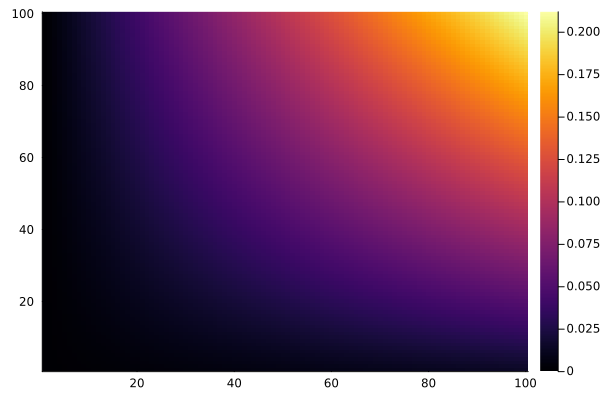

In [167]:
w_mes = [
    0.003,
    √(0.03e-3^2+0.01e-3^2),
    √(0.03e-3^2+0.01e-3^2),
    √(0.03e-3^2+0.01e-3^2),
    0.001
]
masterDict = Dict(
    T       => 0.1,
    h       => 0.1,
    r_1     => 0.026,
    r_2     => 0.0275,
    ω       => 12.5,
    (w     .=> w_mes )...,
    π       => 3.1415926535897,
    μ       => 2
)
masterDict = Dict(
    T       => 0.1,
    h       => 0.06,
    r_1     => 0.026,
    r_2     => 0.0275,
    ω       => 12.5,
    (w     .=> w_mes )...,
    π       => 3.1415926535897,
    μ       => 2
)
using Plots
L = ((range(0.2,3,100)) * (range(0,16,100))') .*(1/((r_2-r_1)/(2π*r_1^3*h)))(masterDict)
heatmap(L)

# τ = (1/((r_2-r_1)/(2π*r_1^3*h)))(masterDict) * 2*12
# H = (τ*(r_2-r_1)/(2π*r_1^3*ω*μ))(masterDict)
# w_μguess = 0.025
# 2 * w_μguess

# RSSC = UMF ./ varis .* w
# [i(masterDict) for i in RSSC] * 100
# [i(masterDict) for i in UMF]
# [i(masterDict) for i in UPC] * 100
# [i(masterDict) for i in w_r] * 100
# w_mes
# varis
# M(masterDict)
# w_μr(masterDict)
# w_μr


# o = 1/.336 * maximum(L)
# √((0.015o)^2 + 0.1e-3^2) * .336
# .336o
# w_r
